# Image Classification using CNNs

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import pathlib 
import PIL
import cv2

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

plt.style.use('ggplot')

### Load in Data

In [3]:
data_dir = pathlib.Path("input/Training_data/")

In [4]:
# Get the number of images
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

600


### Preview Images

In [5]:
# Set path for image classes
driving_license = list(data_dir.glob('driving_license/*'))
social_security = list(data_dir.glob('social_security/*'))
others = list(data_dir.glob('others/*'))

str(driving_license[0])

'input/Training_data/driving_license/63.jpg'

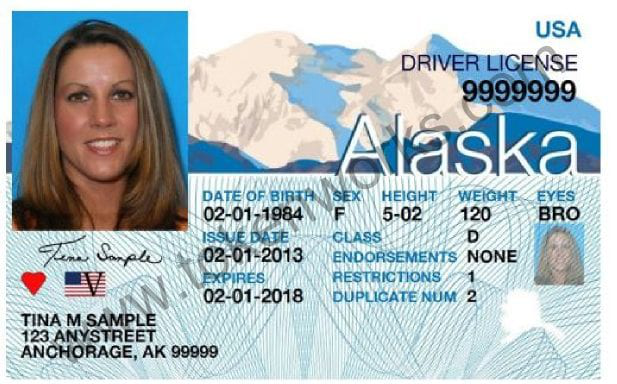

In [6]:
# Preview an image
PIL.Image.open(str(driving_license[12]))

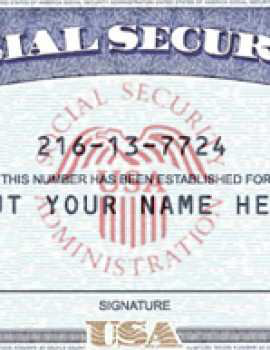

In [7]:
PIL.Image.open(str(social_security[1]))

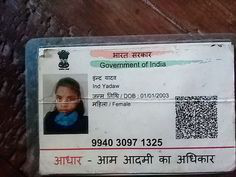

In [8]:
PIL.Image.open(str(others[145]))

In [9]:
# Explore using opencv

# img_color = cv2.imread(str(driving_license[12]),cv2.IMREAD_COLOR)
# cv2.imshow('color image',img_color)  
# cv2.waitKey(0)  
# cv2.destroyAllWindows() 

<AxesSubplot: ylabel='count'>

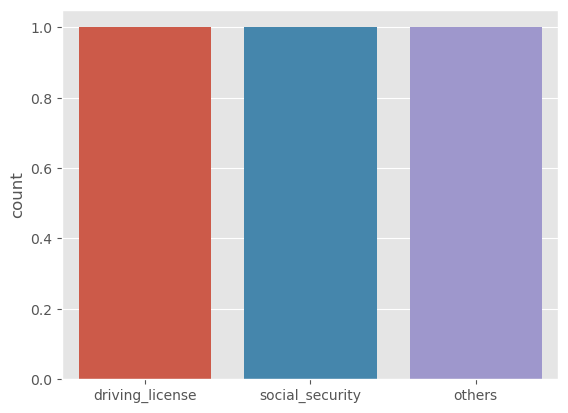

In [10]:
# Display count of each class 
dict_ = {
    "driving_license": len(driving_license),
    "social_security": len(social_security),
    "others": len(others)
}

df = pd.DataFrame([dict_])

sns.countplot(df)

### Load data and create tf.Dataset using a Keras utility

In [11]:
# Declare Variables
batch_size = 32
img_height = 180
img_width = 180

In [14]:
# Create Training Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 480 files for training.
Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-11-28 20:35:03.222522: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-28 20:35:03.222658: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [34]:
# Create Validation Dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [17]:
class_names = train_ds.class_names
class_names

['driving_license', 'others', 'social_security']

### Load Data and Create Batches using ImageDataGenerator

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.20)

train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    subset="training",
    class_mode='categorical',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)


valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.20)

valid_generator = valid_datagen.flow_from_directory(
    directory=data_dir,
    subset="validation",
    class_mode='categorical',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
